In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from dataset_loading import CocoLoader


In [2]:
coco=CocoLoader() #TODO: can add config here?
transforms = None
data_train, api = coco.load_train(transformations=transforms)
#data_val, api = coco.load_val(transformations=transforms) 


loading annotations into memory...
Done (t=14.53s)
creating index...
index created!
loading annotations into memory...
Done (t=14.43s)
creating index...
index created!


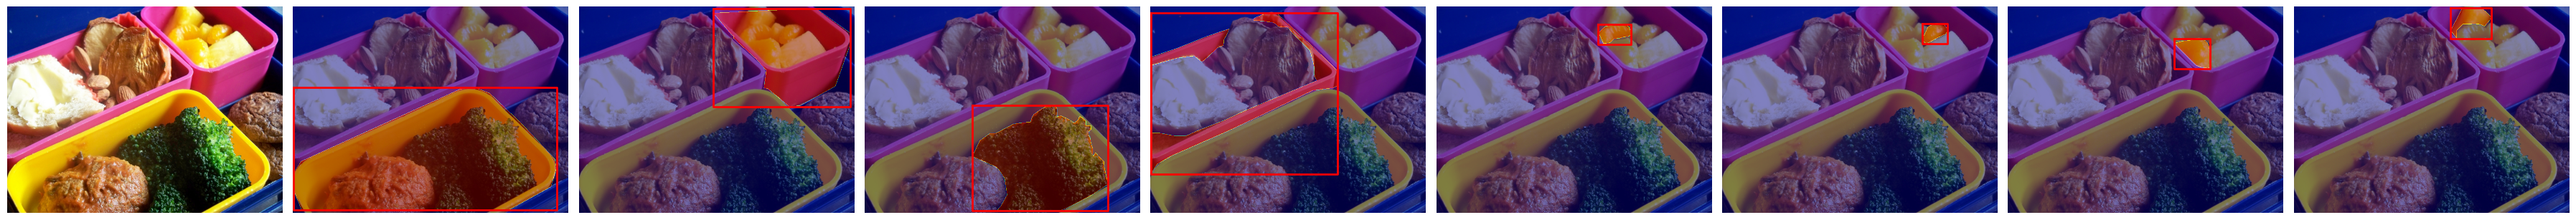

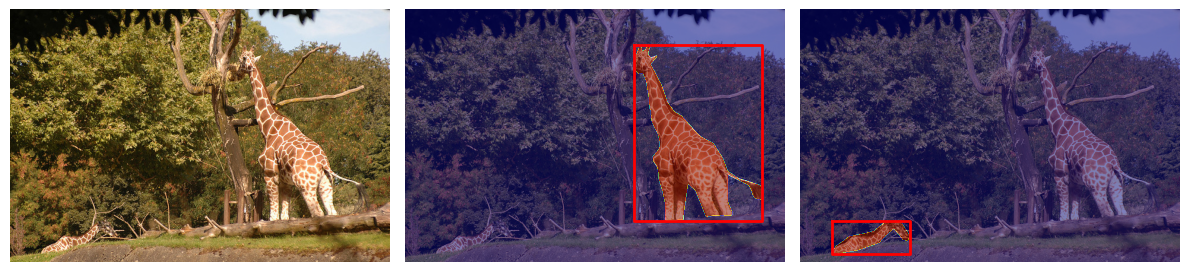

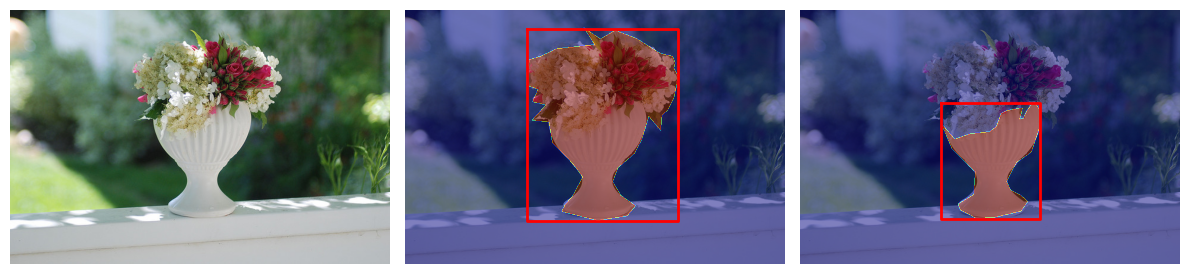

In [3]:
images_to_show =3

scale=4

for i in range(images_to_show):
    item = data_train[i]
    img = item[0]
    metadata = item[1]

    num_imgs = len(metadata)+1
    fig, axes = plt.subplots(1, num_imgs, figsize=(num_imgs * scale,  scale))
    axes=axes.flatten()

    for i,ax in enumerate(axes):
        if i==0: #straight up image
            ax.imshow(img)
            ax.axis('off')

        else: #masks
            rle = metadata[i-1]
            mask = api.annToMask(rle)
            ax.axis('off')
            ax.imshow(img)
            ax.imshow(mask, cmap='jet', alpha=0.5)

            box = rle['bbox']
            ax.plot([box[0], box[0] + box[2], box[0] + box[2], box[0], box[0]],
                    [box[1], box[1], box[1] + box[3], box[1] + box[3], box[1]],
                    color='red', linewidth=2)
    plt.tight_layout()
    plt.show()



In [ ]:

GTboxes=[]
for item in dataset_loading: 
    img = item[0]
    metadata = item[1]
    bboxes_per_img = [] #unknown number of objects
    for mask in metadata:
        box = mask['bbox']
        bboxes_per_img.append(box)
        # TODO: additional logic for masks later 
    GTboxes.append(bboxes_per_img)
        
    #use model to predict BBox
    #compare with GT in GTBBox (torchmetrics!)
    #   iou defined in pycocotools too

    break


[[[185.45, 95.61, 389.41, 328.39], [0.0, 45.73, 265.83, 373.51]], [[278.34, 177.49, 155.65, 46.1], [282.49, 61.11, 139.43, 155.73]], [[608.11, 180.97, 12.41, 10.36], [262.99, 100.96, 88.01, 139.9], [250.15, 75.84, 19.76, 57.13], [525.09, 82.65, 30.64, 94.64], [555.94, 78.43, 22.29, 48.83], [598.66, 87.57, 35.71, 41.34], [610.4, 52.17, 29.6, 50.72], [556.69, 60.99, 13.09, 32.38], [565.98, 71.82, 53.39, 4.95], [572.39, 52.53, 56.05, 6.2]], [[405.06, 205.09, 45.97, 111.4], [2.87, 4.74, 454.77, 416.66], [79.11, 2.59, 418.35, 411.61]], [[566.84, 188.01, 28.31, 74.72], [527.39, 190.37, 26.97, 76.13], [487.16, 200.54, 27.37, 67.54], [455.18, 196.67, 26.94, 76.24], [268.94, 184.75, 20.15, 58.07], [234.57, 183.48, 32.54, 60.46], [159.83, 192.23, 20.53, 33.52], [164.47, 220.56, 19.14, 65.77], [135.19, 228.71, 30.36, 69.14], [108.94, 226.3, 26.97, 72.45], [230.23, 225.08, 21.92, 68.87], [255.28, 200.5, 36.19, 18.39], [161.98, 201.97, 31.84, 36.13], [231.21, 243.57, 44.31, 22.83], [96.51, 237.51, 